In [1]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from reckit import Configurator
from importlib.util import find_spec
from importlib import import_module
from reckit import typeassert
import os
import numpy as np
import random

import pprint
pp = pprint.PrettyPrinter(indent=4)

@typeassert(recommender=str, platform=str)
def find_recommender(recommender, platform="pytorch"):
    model_dirs = set(os.listdir("model"))
    model_dirs.remove("base")

    module = None
    if platform == "pytorch":
        platforms = ["pytorch", "tensorflow"]
    elif platform == "tensorflow":
        platforms = ["tensorflow", "pytorch"]
    else:
        raise ValueError(f"unrecognized platform: '{platform}'.")

    for platform in platforms:
        if module is not None:
            break
        for tdir in model_dirs:
            spec_path = ".".join(["model", tdir, platform, recommender])
            if find_spec(spec_path):
                module = import_module(spec_path)
                break

    if module is None:
        raise ImportError(f"Recommender: {recommender} not found")

    if hasattr(module, recommender):
        Recommender = getattr(module, recommender)
    else:
        raise ImportError(f"Import {recommender} failed from {module.__file__}!")
    return Recommender

config = Configurator()
config.add_config("NeuRec.ini", section="NeuRec")

os.environ['CUDA_VISIBLE_DEVICES'] = str(config["gpu_id"])

seed=2020
seed=config["seed"]

np.random.seed(seed)
random.seed(seed)
tf.set_random_seed(seed)
print("set tensorflow seed")

Recommender = find_recommender(config.recommender, platform=config.platform)

model_cfg = os.path.join("conf", config.recommender + ".ini")
config.add_config(model_cfg, section="hyperparameters", used_as_summary=True)

config.sections["MF:[hyperparameters]"]['epochs'] = '20'

recommender = Recommender(config)
results = recommender.train_model()

set tensorflow seed
2020-11-01 07:33:53.905: my pid: 15088
2020-11-01 07:33:53.910: model: model.general_recommender.tensorflow.MF
2020-11-01 07:33:53.912: Dataset statistics:
Name: ml-100k_ratio_u5_i5
The number of users: 943
The number of items: 1349
The number of ratings: 99287
Average actions of users: 105.29
Average actions of items: 73.60
The sparsity of the dataset: 92.195075%

The number of training: 69918
The number of validation: 0
The number of testing: 29369
2020-11-01 07:33:53.914: NeuRec:[NeuRec]:
recommender=MF
platform=tensorflow
data_dir='dataset\ml-100k_ratio_u5_i5'
file_column=UIRT
sep='\t'
gpu_id=0
gpu_mem=0.99
metric=["Precision", "Recall", "MAP", "NDCG", "MRR"]
top_k=[10,20]
test_thread=4
test_batch_size=64
seed=2020

MF:[hyperparameters]:
lr=0.001
reg=0.001
embedding_size=64
batch_size=1024
epochs=20
is_pairwise=True
loss_func=bpr
param_init=normal


C:\Projects\NeuRec\data\dataset.py:264: UserWarning: dataset\ml-100k_ratio_u5_i5\ml-100k_ratio_u5_i5.valid does not exist.
  warnings.warn("%s does not exist." % valid_file)


2020-11-01 07:33:55.483: metrics:	Precision@10	Precision@20	Recall@10   	Recall@20   	MAP@10      	MAP@20      	NDCG@10     	NDCG@20     	MRR@10      	MRR@20      
2020-11-01 07:33:56.645: epoch 0:	0.25217411  	0.21680847  	0.10194939  	0.16059184  	0.16398172  	0.13514918  	0.27975053  	0.26907665  	0.50110006  	0.50659615  
2020-11-01 07:33:57.414: epoch 1:	0.30360571  	0.23849434  	0.12512404  	0.17892383  	0.21760203  	0.17085622  	0.34101066  	0.31150830  	0.58136064  	0.58449739  
2020-11-01 07:33:58.129: epoch 2:	0.29862180  	0.24538726  	0.12619358  	0.19197065  	0.21382964  	0.17472084  	0.33784923  	0.31973657  	0.58334184  	0.58745164  
2020-11-01 07:33:58.993: epoch 3:	0.31346804  	0.25588560  	0.14043286  	0.20987807  	0.22393459  	0.18571451  	0.35447320  	0.33707729  	0.60290378  	0.60636669  
2020-11-01 07:33:59.660: epoch 4:	0.32343620  	0.26664919  	0.14945225  	0.22634034  	0.23114923  	0.19570784  	0.36462009  	0.35165074  	0.61245561  	0.61576539  
2020-11-01 07:34

In [2]:
myresult={x +'@'+ str(y): [] * config.epochs for x in config.metric for y in config.top_k}
print(myresult)


{'Precision@10': [], 'Precision@20': [], 'Recall@10': [], 'Recall@20': [], 'MAP@10': [], 'MAP@20': [], 'NDCG@10': [], 'NDCG@20': [], 'MRR@10': [], 'MRR@20': []}


In [3]:
metrics=list(x +'@'+ str(y) for x in config.metric for y in config.top_k)
print(metrics)

['Precision@10', 'Precision@20', 'Recall@10', 'Recall@20', 'MAP@10', 'MAP@20', 'NDCG@10', 'NDCG@20', 'MRR@10', 'MRR@20']


In [4]:

for epoch,r in enumerate(results):
    for metric_arr in r:
        for itenN,value in enumerate(metric_arr):
            #print("{} {} {}".format(epoch, itenN, value))
            myresult[metrics[itenN]].append(value)
            
pp.pprint(myresult)


{   'MAP@10': [   0.16398172,
                  0.21760203,
                  0.21382964,
                  0.22393459,
                  0.23114923,
                  0.24385907,
                  0.25517836,
                  0.26021188,
                  0.26699644,
                  0.26848605,
                  0.27034625,
                  0.2702784,
                  0.2699228,
                  0.27352324,
                  0.27589515,
                  0.27860197,
                  0.28123182,
                  0.282247,
                  0.28218627,
                  0.28325158],
    'MAP@20': [   0.13514918,
                  0.17085622,
                  0.17472084,
                  0.18571451,
                  0.19570784,
                  0.20685188,
                  0.21513873,
                  0.22055991,
                  0.2269021,
                  0.23134477,
                  0.23268609,
                  0.23372246,
                  0.23455001,
              

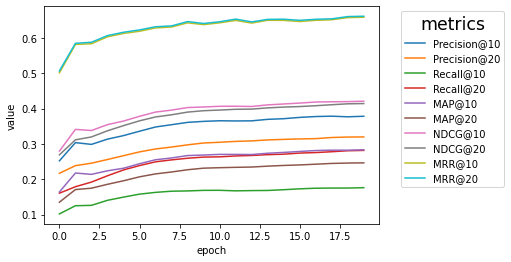

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

for m in metrics:
    plt.plot(list(range(config.epochs)), myresult[m], label=m)

    
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='metrics', title_fontsize='xx-large')
#plt.legend()
plt.show()